/Users/liuliangjie/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
[*********************100%***********************]  82 of 82 completed


After dropping NaN columns, 82 stocks remain.
Ticker       0001.HK   0002.HK   0003.HK   0005.HK   0006.HK   0011.HK  \
Date                                                                     
2021-08-13 -0.006048  0.003866  0.004713 -0.002260  0.002020 -0.001355   
2021-08-16  0.006048  0.008963  0.010912  0.003388  0.007039 -0.004076   
2021-08-17 -0.003451 -0.004471 -0.007782 -0.011338 -0.010070 -0.001362   
2021-08-18  0.010318  0.005745  0.012423 -0.010315  0.002022 -0.006840   
2021-08-19 -0.016387 -0.005745 -0.009302 -0.011852  0.004032 -0.016609   

Ticker       0012.HK   0016.HK   0017.HK   0027.HK  ...   3988.HK   6618.HK  \
Date                                                ...                       
2021-08-13  0.008415 -0.010870 -0.004030 -0.005089  ... -0.003670 -0.008500   
2021-08-16  0.008345  0.008163  0.009377  0.003057  ... -0.003683 -0.025267   
2021-08-17 -0.012544 -0.004527 -0.005348 -0.032044  ...  0.007353 -0.047579   
2021-08-18  0.005594  0.017986  0.000000

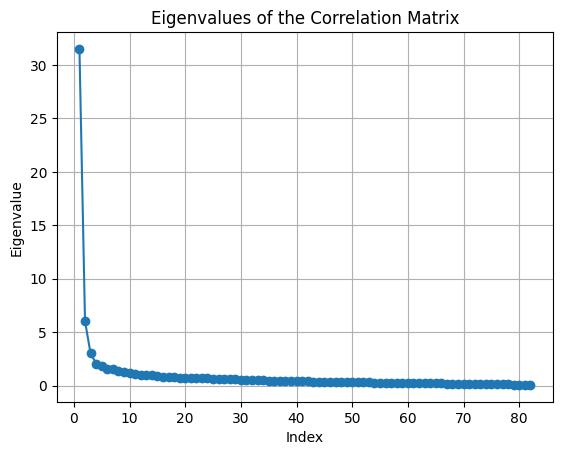

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 读取所有股票代码和行业信息
df = pd.read_excel('all_stocks.xlsx')
all_stock_name = df['股份代號 Stock Code'].tolist()
all_industry_name = df['行業 Industry'].tolist()

# 处理行业信息，去掉非字母字符
industry = {code: ''.join(filter(str.isalpha, industry)) 
            for code, industry in zip(df['股份代號 Stock Code'], df['行業 Industry'])}

# 下载股票数据
hs_data = yf.download(all_stock_name, start='2001-01-01', end='2024-01-01', progress=True)
hs_return = hs_data['Adj Close']

# 计算对数收益率
hs_log_returns = np.log(hs_return / hs_return.shift(1)).dropna()

# 剔除含缺失值的股票
hs_log_returns = hs_log_returns.dropna(axis=1)
print(f"After dropping NaN columns, {hs_log_returns.shape[1]} stocks remain.")

# 显示处理后的数据
print(hs_log_returns.head())

# 计算相关性矩阵
correlation_matrix = hs_log_returns.corr()

# 计算特征值和特征向量
eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix)

# 输出特征值和特征向量
with np.printoptions(precision=3):
    print("Correlation Matrix:\n", correlation_matrix)
    print("Eigenvalues:\n", eigenvalues)
    print("Eigenvectors:\n", eigenvectors)

# 按特征值降序排序
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# 绘制特征值图像
plt.figure()
plt.plot(range(1, len(sorted_eigenvalues) + 1), sorted_eigenvalues, marker='o')
plt.title('Eigenvalues of the Correlation Matrix')
plt.xlabel('Index')
plt.ylabel('Eigenvalue')
plt.grid()
plt.savefig('eigenvalues_plot.png')
plt.show()

28


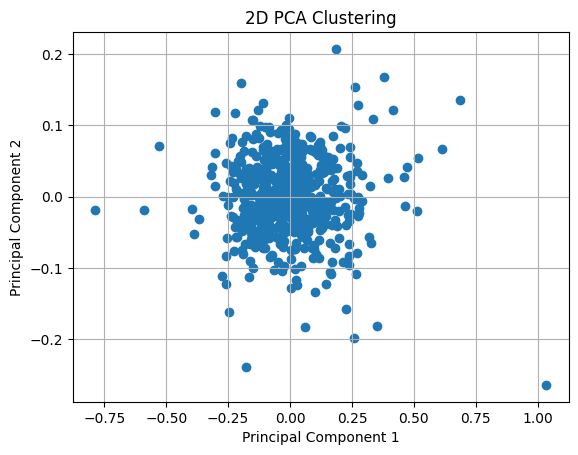

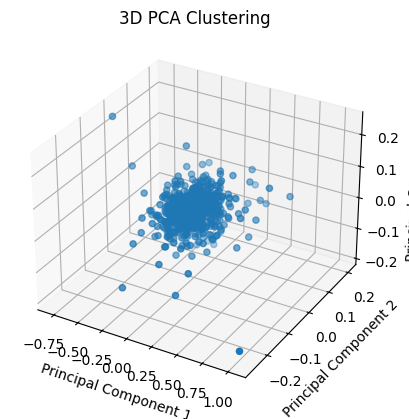

In [2]:
# 计算累计方差
explained_variance_ratio = sorted_eigenvalues / sorted_eigenvalues.sum()
cumulative_variance = np.cumsum(explained_variance_ratio)

# 找到累计方差超过70%的主成分数量
num_components = np.argmax(cumulative_variance >= 0.8) + 1
print(num_components)
# PCA 降维
pca = PCA(n_components=num_components)
principal_components = pca.fit_transform(hs_log_returns)

# 可视化聚类 (2D)
plt.figure()
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.title('2D PCA Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

# 可视化聚类 (3D)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(principal_components[:, 0], principal_components[:, 1], principal_components[:, 2])
ax.set_title('3D PCA Clustering')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

Short positions in Equal Weight PCA: [ 0  2  9 12 14 16 17 21 24 31 32 34 41 45 47 50 51 53 56 57 60 62 64 66
 69 70 71 72 76 78 80 81]
Short positions: [ 0  2  3  5  8  9 11 12 14 16 17 21 24 31 32 34 36 41 45 47 48 50 51 53
 56 57 58 60 61 62 64 66 67 68 69 70 71 72 76 78 80 81]


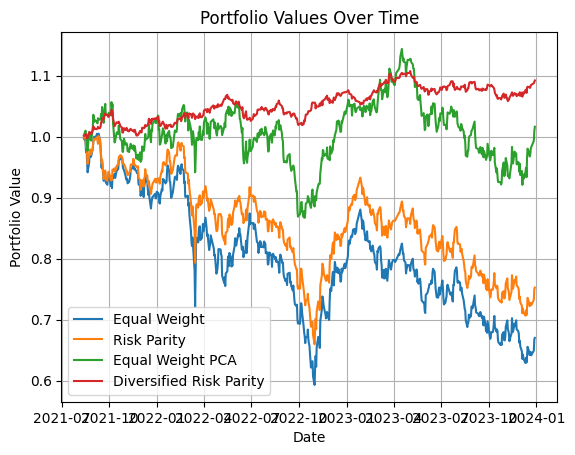

[*****                 11%                       ]  9 of 82 completed

Equal Weight: Total Return=-0.327, Std Dev=0.016, Min Value=0.593
Risk Parity: Total Return=-0.233, Std Dev=0.013, Min Value=0.659
Equal Weight PCA: Total Return=0.053, Std Dev=0.011, Min Value=0.867
Diversified Risk Parity: Total Return=0.091, Std Dev=0.003, Min Value=0.997


[*********************100%***********************]  82 of 82 completed


Test Log Returns:
Ticker       0001.HK   0002.HK   0003.HK   0005.HK   0006.HK   0011.HK  \
Date                                                                     
2024-01-03  0.002421 -0.003135 -0.015293 -0.003979 -0.009983 -0.006803   
2024-01-04 -0.008500  0.003917  0.003419 -0.008007  0.006667 -0.006277   
2024-01-05 -0.004890 -0.001565  0.006803  0.002409 -0.003328 -0.000572   
2024-01-08 -0.003683 -0.011024 -0.006803  0.004800 -0.012298 -0.005744   
2024-01-09  0.009792  0.003951  0.010187  0.012689  0.003369 -0.003462   

Ticker       0012.HK   0016.HK   0017.HK   0027.HK  ...   3988.HK   6618.HK  \
Date                                                ...                       
2024-01-03 -0.041176 -0.026086 -0.025931 -0.005640  ...  0.000000 -0.060706   
2024-01-04  0.008811 -0.005547 -0.015887 -0.002265  ...  0.006757 -0.021083   
2024-01-05  0.000000 -0.003095 -0.014337 -0.028754  ...  0.000000 -0.022989   
2024-01-08 -0.015470 -0.013105 -0.009066 -0.033218  ... -0.016978 -0

In [3]:
# 定义计算权重的函数
def equal_weight_weights(log_returns):
    n_assets = log_returns.shape[1]
    weights = np.ones(n_assets) / n_assets
    return weights

def risk_parity_weights(log_returns):
    volatilities = log_returns.std()
    weights = 1 / volatilities
    weights /= weights.sum()
    return weights
    
def equal_weight_pca_weights(eigenvectors, num_components):
    # 确保符号一致
    n_assets = eigenvectors.shape[0]
    avg_vector = np.ones(n_assets) / n_assets
    for i in range(num_components):
        if np.dot(eigenvectors[:, i], avg_vector) < 0:
            eigenvectors[:, i] = -eigenvectors[:, i]
    pca_weights = eigenvectors[:, :num_components].mean(axis=1)
    short_positions = pca_weights < 0
    print("Short positions in Equal Weight PCA:", np.where(short_positions)[0])
    pca_weights /= pca_weights.sum()
    return pca_weights

def diversified_risk_parity_weights(eigenvalues, eigenvectors, num_components):
    portfolio_variances = eigenvalues[:num_components]
    weights = 1 / np.sqrt(portfolio_variances)
    weights /= weights.sum()
    asset_weights = eigenvectors[:, :num_components].dot(weights)
    short_positions = asset_weights < 0
    print("Short positions:", np.where(short_positions)[0])
    asset_weights /= np.abs(asset_weights).sum()
    return asset_weights
    
# 在训练数据上计算权重
equal_weight_w = equal_weight_weights(hs_log_returns)
risk_parity_w = risk_parity_weights(hs_log_returns)
equal_weight_pca_w = equal_weight_pca_weights(sorted_eigenvectors, num_components)
div_risk_parity_w = diversified_risk_parity_weights(sorted_eigenvalues, sorted_eigenvectors, num_components)

# 计算组合收益率
equal_weight_returns = hs_log_returns.dot(equal_weight_w)
risk_parity_returns = hs_log_returns.dot(risk_parity_w)
equal_weight_pca_returns = hs_log_returns.dot(equal_weight_pca_w)
div_risk_parity_returns = hs_log_returns.dot(div_risk_parity_w)

# 将策略和对应的权重保存起来
strategies = {
    "Equal Weight": equal_weight_w,
    "Risk Parity": risk_parity_w,
    "Equal Weight PCA": equal_weight_pca_w,
    "Diversified Risk Parity": div_risk_parity_w,
}

# 绘制每日组合价值
equal_weight_value = (1 + equal_weight_returns).cumprod()
risk_parity_value = (1 + risk_parity_returns).cumprod()
equal_weight_pca_value = (1 + equal_weight_pca_returns).cumprod()
div_risk_parity_value = (1 + div_risk_parity_returns).cumprod()

plt.figure()
plt.plot(equal_weight_value, label='Equal Weight')
plt.plot(risk_parity_value, label='Risk Parity')
plt.plot(equal_weight_pca_value, label='Equal Weight PCA')
plt.plot(div_risk_parity_value, label='Diversified Risk Parity')
plt.title('Portfolio Values Over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.legend()
plt.grid()
plt.savefig('portfolio_values.png')
plt.show()

# 计算收益率与标准差
def strategy_performance(portfolio_returns):
    total_return = portfolio_returns.sum()
    std_dev = portfolio_returns.std()
    min_value = (1 + portfolio_returns).cumprod().min()
    return total_return, std_dev, min_value

performance_results = {}
for name, returns in {
    "Equal Weight": equal_weight_returns,
    "Risk Parity": risk_parity_returns,
    "Equal Weight PCA": equal_weight_pca_returns,
    "Diversified Risk Parity": div_risk_parity_returns,
}.items():
    performance_results[name] = strategy_performance(returns)

# 打印结果
with np.printoptions(precision=3):
    for name, metrics in performance_results.items():
        print(f"{name}: Total Return={metrics[0]:.3f}, Std Dev={metrics[1]:.3f}, Min Value={metrics[2]:.3f}")

# 下载测试数据
test_data = yf.download(all_stock_name, start='2024-01-01', end='2024-12-17')['Adj Close']
test_log_returns = np.log(test_data / test_data.shift(1)).dropna()

# 检查 test_log_returns
print("Test Log Returns:")
print(test_log_returns.head())
print(test_log_returns.tail())

# 测试每种策略
test_results = {}
for name, weights in strategies.items():
    # 将权重转换为Series并对齐列
    weights = pd.Series(weights, index=hs_log_returns.columns)
    # 对齐测试数据和权重的列
    weights = weights.reindex(test_log_returns.columns).fillna(0)
    # 确保权重之和为1
    if weights.sum() == 0:
        print(f"All weights are zero for {name} during test period. Skipping.")
        continue
    weights /= weights.sum()
    # 打印权重形状
    print(f"{name} Weights Shape: {weights.shape}")
    # 计算测试期收益率
    test_returns = test_log_returns.dot(weights)
    test_results[name] = test_returns

# 打印测试结果
with np.printoptions(precision=3):
    for name, returns in test_results.items():
        total_return = returns.sum()  # 累积收益
        print(f"{name}: Test Period Return={total_return:.3f}")